In [1]:
#Importing the libraries that are being used or were used while EDA

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from nltk.stem.porter import *
stemmer = PorterStemmer()

from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score
from bayes_opt import BayesianOptimization

Using TensorFlow backend.
/home/xavient/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/xavient/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/xavient/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/xavient/anaconda3/lib/python3.7/site-packages/t

In [2]:
pd.options.display.max_colwidth = 1000

In [3]:
data = pd.read_csv('./Data.csv')

In [4]:
data.sentiment.value_counts(normalize=True)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: sentiment, dtype: float64

###### Here we can see that the distribution of the target labels is imbalanced i.e. there are much more negative reviews than positive and neutral reviews. So visualizing the data imbalance

negative    9178
neutral     3099
positive    2363
Name: sentiment, dtype: int64


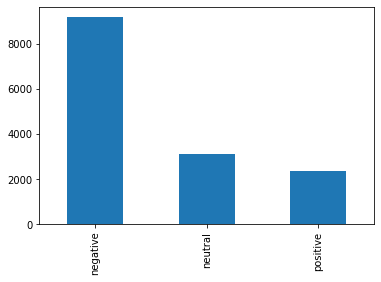

In [5]:
print(data['sentiment'].value_counts())
data['sentiment'].value_counts().plot.bar()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 7 columns):
tweet_id          14640 non-null int64
sentiment         14640 non-null object
name              14640 non-null object
text              14640 non-null object
tweet_created     14640 non-null object
tweet_location    9907 non-null object
user_timezone     9820 non-null object
dtypes: int64(1), object(6)
memory usage: 800.7+ KB


###### Looking at the data, it seems to be specific to airlines and flights

In [7]:
data[data.sentiment == 'negative']

,tweet_id,sentiment,name,text,tweet_created,tweet_location,user_timezone
3,4,negative,jnardino,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",24/02/15 11:15,NaN,Pacific Time (US & Canada)
4,5,negative,jnardino,and it's a really big bad thing about it,24/02/15 11:14,NaN,Pacific Time (US & Canada)
5,6,negative,jnardino,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,24/02/15 11:14,NaN,Pacific Time (US & Canada)
15,16,negative,smartwatermelon,SFO-PDX schedule is still MIA.,24/02/15 10:01,"palo alto, ca",Pacific Time (US & Canada)
17,18,negative,heatherovieda,I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!,24/02/15 9:39,this place called NYC,Eastern Time (US & Canada)
20,21,negative,MISSGJ,why are your first fares in May over three times more than other carriers when all seats are available to select???,24/02/15 8:55,NaN,NaN
24,25,negative,ayeevickiee,you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... __ I want free internet,24/02/15 8:18,714,Mountain Time (US & Canada)
25,26,negative,Leora13,status match program. I applied and it's been three weeks. Called and emailed with no response.,24/02/15 7:49,NaN,NaN
26,27,negative,meredithjlynn,What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat anything for next 6 hrs #fail,24/02/15 7:11,NaN,NaN
28,29,negative,blackjackpro911,amazing to me that we can't get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS,24/02/15 5:05,"San Mateo, CA & Las Vegas, NV",NaN


#### The columns other than the text might also be used to create features, but I would only be using the text data for now

###### Dropping the columns that are not required

In [8]:
data.columns

Index(['tweet_id', 'sentiment', 'name', 'text', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [9]:
data.drop(['name', 'tweet_created','tweet_location', 'user_timezone'], axis = 1, inplace = True)

In [10]:
data[data.sentiment == 'negative']

,tweet_id,sentiment,text
3,4,negative,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,5,negative,and it's a really big bad thing about it
5,6,negative,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
15,16,negative,SFO-PDX schedule is still MIA.
17,18,negative,I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!
20,21,negative,why are your first fares in May over three times more than other carriers when all seats are available to select???
24,25,negative,you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... __ I want free internet
25,26,negative,status match program. I applied and it's been three weeks. Called and emailed with no response.
26,27,negative,What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat anything for next 6 hrs #fail
28,29,negative,amazing to me that we can't get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS


### 1. Preprocessing: The preprocessing is done to clean up the data, and get rid of the features that might not be required
    a. First we need to remove any userhandles(starting with @) that might be a part of the 
       tweets which won't be contributing to the decision making of the model
    b. Second we can replace certain emojis by some replacement text i.e text annotation 
       like [':)' -> 'happy', ':D' -> 'laugh'].
    c. Then we need to remove any links that might be present in a tweet, because most of 
       the times, the tweet data is also not veru helpful in deciding the result
    d. Now we can remove characters other than alphabets because they won't be of great help for the 
       ML model while making predictions.
    

###### We can also make use of the information from popular hashtags, but as there are many hashtags and limited time. I won't be making use of them for now. Here we have just removed the '#' symbol and taking in the hashtag content as normal text, which would be  helpful upto some extent.


In [11]:
from collections import defaultdict
hashtags = []
_ = data.text.apply(lambda x: hashtags.extend(re.findall('#[\w]*', x)))

In [12]:
hashtags

['#fabulous',
 '#Seductive',
 '#stress',
 '#29DaysToGo',
 '#fail',
 '#VX358',
 '#noair',
 '#worstflightever',
 '#roasted',
 '#SFOtoBOS',
 '#sendambien',
 '#andchexmix',
 '#MoodlitMonday',
 '#ScienceBehindTheExperience',
 '#MoodlitMonday',
 '#travelhelp',
 '#elevategold',
 '#tribute',
 '#SoundOfMusic',
 '#Oscars2015',
 '#guiltypleasures',
 '#CarrieUnderwood',
 '#CMFat35000feet',
 '#neverflyvirginforbusiness',
 '#inflight',
 '#flightattendant',
 '#dreampath',
 '#neverflyvirginforbusiness',
 '#neverflyvirgin',
 '#change',
 '#nomorevirgin',
 '#uncomfortable',
 '#sfo2lax',
 '#sneaky',
 '#customerservice',
 '#virginamerica',
 '#flying',
 '#sarcasm',
 '#CheapFlights',
 '#FareCompare',
 '#CheapFlights',
 '#FareCompare',
 '#CheapFlights',
 '#FareCompare',
 '#CheapFlights',
 '#FareCompare',
 '#PHL',
 '#pleasecomeback',
 '#VAbeatsJblue',
 '#Oscars2015',
 '#likingyoulessandless',
 '#Oscars',
 '#redcarpet',
 '#oscars',
 '#oscars2015',
 '#frustrated',
 '#lame',
 '#irmafromDallas',
 '#PrincessHalf',


In [13]:
hash_dict = defaultdict(int)
for tag in hashtags:
    hash_dict[tag] += 1

In [14]:
sorted(hash_dict.items(), key = lambda kv: kv[1])[-10:]

[('#disappointed', 22),
 ('#AmericanAirlines', 24),
 ('#usairwaysfail', 26),
 ('#NAME', 27),
 ('#customerservice', 34),
 ('#jetblue', 35),
 ('#UnitedAirlines', 35),
 ('#fail', 57),
 ('#DestinationDragons', 75),
 ('#', 147)]

In [15]:
# To remove user handles
re_user_handles = '@[\w]*'

# To replace emojis by text that might be helpful
emoji_dict = {':\)': 'happy', ':\(': 'sad', ':\/': 'sad', ':D': 'laugh'}

# To remove urls
re_links = 'https?://[^ ]*'

# To replace n't by not among other things
repl_dict = {'\'s' : ' is', '\'ve': ' have', 'n\'t': ' not'}

def clean_tweet(text):
    text = re.sub(re_user_handles, ' ', text)
    text = re.sub(re_links, ' ', text)
    
    for key in repl_dict:
        text = re.sub(key, repl_dict[key], text)    
    
    for key in emoji_dict:
        text = re.sub(key, emoji_dict[key], text)
    return text

data['clean_tweet'] = data.text.apply(lambda x: clean_tweet(x))

### Reducing the dimensions of the final vocabulary of words
    a. For this, we can lowercase the words, so that same word like (sad, Sad) are taken as a 
       single entry in the vocabulary.
    b. Removing multiple character repitition.(killlll should be replaced by kill)
    c. We can use stemming or lemmatization to reduce the words to their base form. We should try with both and should use whichever gives the better result for the problem at hand.
    d. Remove stopwords.
    e. Removing words with length less than 2 as they won't be of much help

In [16]:
data

,tweet_id,sentiment,text,clean_tweet
0,1,neutral,What @dhepburn said.,What said.
1,2,positive,plus you've added commercials to the experience... tacky.,plus you have added commercials to the experience... tacky.
2,3,neutral,I didn't today... Must mean I need to take another trip!,I did not today... Must mean I need to take another trip!
3,4,negative,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,5,negative,and it's a really big bad thing about it,and it is a really big bad thing about it
5,6,negative,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,seriously would pay $30 a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA
6,7,positive,"yes, nearly every time I fly VX this __ar worm_ won__ go away :)","yes, nearly every time I fly VX this __ar worm_ won__ go away happy"
7,8,neutral,"Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP","Really missed a prime opportunity for Men Without Hats parody, there."
8,9,positive,"Well, I didn't_but NOW I DO! :-D","Well, I did not_but NOW I DO! :-D"
9,10,positive,"it was amazing, and arrived an hour early. You're too good to me.","it was amazing, and arrived an hour early. You're too good to me."


In [17]:
# We would only the stopwords which are useful from this list and can add more stopwords that we might feel are needed
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
# stop_words = stopwords.words('english')  # We can also use a curated list here
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", 
               "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 
               'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 
               'which', 'this', 'that', "that'll", 'had', 'a', 'an', 'the', 'and', 'amp'
               'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 
               'will', 'ain', 'aren', "aren't", 'as', 'into', 'here', 'there', 
               'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'too', 'very','can', "flight"]

def build_vocabulary(text):
    # To replace any characters other than letters and spaces
    re_characters = '[^A-Z a-z]'
    
    text = text.lower()
    text = re.sub(r"(.)\1{2,}", r"\1\1", text) # Replacing multiple spaces by single space
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split(" ") if word not in stop_words and len(word) > 2])
    text = re.sub(re_characters, ' ', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split(" ") if word not in stop_words and len(word) > 2])
    return text.strip()

data['clean_tweet2'] = data.clean_tweet.apply(lambda x: build_vocabulary(x))

###### Dropping empty data rows from the data, as they won't be usefule in making predictions. Whereas while predicting this can be an issue and we would have to handle that by assigning the class which is most occuring.

In [20]:
data.drop(data[data.clean_tweet2 == ''].index, axis = 0, inplace = True)

In [21]:
sum(data.clean_tweet2.apply(lambda x: len(x)) == 0)

0

In [22]:
# Saving the data to be used by Deep Learning model
data.to_csv('cleanedData.csv', index=False)

### Generating a WordCloud to get a general idea if the data cleaning was successful

###### Positive Word Cloud

In [23]:
positive_words = ' '.join([tweet for tweet in data[data.sentiment == 'positive']['clean_tweet2']])

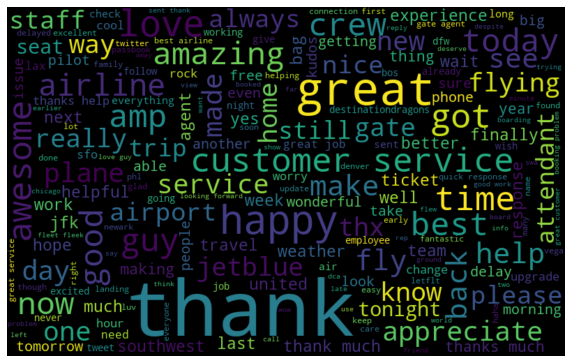

In [24]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

###### Negative Word Cloud

In [25]:
negative_words = ' '.join([tweet for tweet in data[data.sentiment == 'negative']['clean_tweet2']])

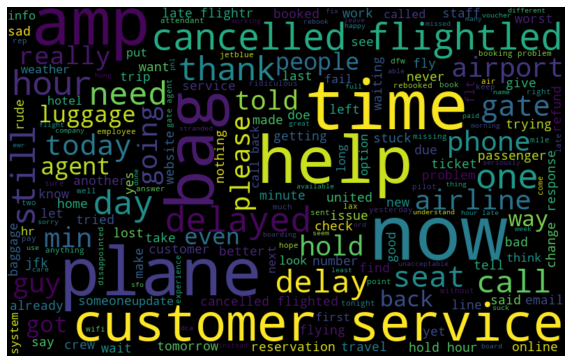

In [26]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

###### Neutral Word Cloud

In [27]:
neutral_words = ' '.join([tweet for tweet in data[data.sentiment == 'neutral']['clean_tweet2']])

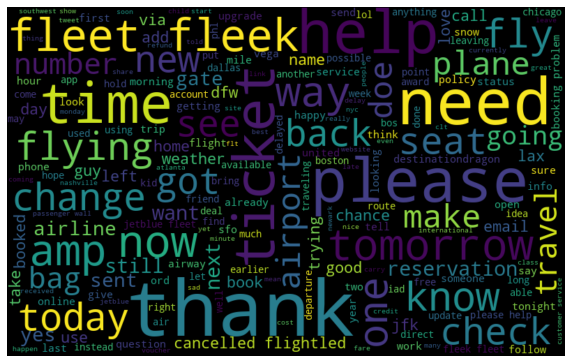

In [28]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### We can see in the wordclouds that flight has a high weightage in all the wordclouds so, we can add such words in stopwords, as they don't help in deciding the tweet's sentiment

### Converting the textual data to numerical data, so that it can be fed to a model.

#### Here we can use various approaches like CountVectorizer, TfIdfVectorizer. I would be taking the TfIdfVectorizer approach because it handles the weightage of words across the documents and within a document

In [29]:
data.head()

,tweet_id,sentiment,text,clean_tweet,clean_tweet2
0,1,neutral,What @dhepburn said.,What said.,what said
1,2,positive,plus you've added commercials to the experience... tacky.,plus you have added commercials to the experience... tacky.,plus added commercial experience tacky
2,3,neutral,I didn't today... Must mean I need to take another trip!,I did not today... Must mean I need to take another trip!,did not today must mean need take another trip
3,4,negative,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",really aggressive blast obnoxious entertainment guest face amp they little recourse
4,5,negative,and it's a really big bad thing about it,and it is a really big bad thing about it,really big bad thing about


In [30]:
# Taking bigram with words that occur within at least 2 documents and at most max_df % of documents
tfidf_vectorizer = TfidfVectorizer(max_df=0.50, min_df=2, max_features=1000, ngram_range=(1,2))

tfidf = tfidf_vectorizer.fit_transform(data.clean_tweet2)

In [31]:
tfidf.shape

(14608, 1000)

In [32]:
tfidf_vectorizer.vocabulary_

{'what': 951,
 'said': 758,
 'plus': 693,
 'experience': 283,
 'did': 235,
 'not': 610,
 'today': 877,
 'must': 589,
 'mean': 550,
 'need': 592,
 'take': 838,
 'another': 38,
 'trip': 892,
 'did not': 236,
 'really': 720,
 'amp': 36,
 'they': 860,
 'little': 515,
 'big': 94,
 'bad': 80,
 'thing': 864,
 'about': 2,
 'seriously': 777,
 'would': 986,
 'pay': 673,
 'for': 335,
 'seat': 767,
 'flying': 329,
 'pay for': 674,
 'yes': 996,
 'every': 274,
 'time': 874,
 'fly': 326,
 'away': 75,
 'happy': 408,
 'every time': 275,
 'missed': 571,
 'without': 973,
 'well': 949,
 'but': 115,
 'now': 635,
 'amazing': 33,
 'arrived': 60,
 'hour': 432,
 'early': 258,
 'good': 392,
 'know': 481,
 'second': 768,
 'cause': 142,
 'pretty': 701,
 'much': 586,
 'better': 91,
 'than': 849,
 'great': 394,
 'deal': 217,
 'already': 30,
 'even': 270,
 'gone': 390,
 'yet': 998,
 'amp not': 37,
 'not even': 614,
 'again': 14,
 'all': 24,
 'from': 366,
 'travel': 886,
 'thanks': 853,
 'sfo': 782,
 'schedule': 765,

In [33]:
# Dividing into the train and validation data, as we should train and validate on separate data. Also, here we are using stratify to maintain the ratio of sentiments in train and validation data.

trainX, valX, trainY, valY = train_test_split(tfidf, data.sentiment, test_size = 0.2, stratify = data.sentiment)

In [34]:
tfidf.shape

(14608, 1000)

In [35]:
trainX.shape, trainY.shape, valX.shape, valY.shape

((11686, 1000), (11686,), (2922, 1000), (2922,))

In [36]:
trainY.value_counts(normalize=True)

negative    0.627931
neutral     0.210423
positive    0.161646
Name: sentiment, dtype: float64

In [37]:
valY.value_counts(normalize=True)

negative    0.627995
neutral     0.210472
positive    0.161533
Name: sentiment, dtype: float64

### As there is a class imbalance let's try SMOTE non majority oversampling. We can handle this class imbalance in other ways too, like data augmenting or collecting more data in the same domain from other sources for the non majority class

In [38]:
sm = SMOTE(random_state = 42, sampling_strategy = 'not majority')
X_res, Y_res = sm.fit_resample(trainX, trainY)

## Model Building: We can try different models and can then use the ensemble of the models. And decide on the basis of parameter that we want to optimize to give more weightage to a model than the other

### SGDClassifier

In [39]:
Y_res.value_counts()

positive    7338
negative    7338
neutral     7338
Name: sentiment, dtype: int64

In [40]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss = "modified_huber", alpha=0.001, random_state=5, max_iter=15, tol=None, class_weight='balanced')
sgd_clf.fit(X_res, Y_res)

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=15, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=5, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
sgd_clf.score(valX, valY)

0.7707049965776865

###### As this is an imbalanced data, so we can't rely or accuracy, we need to look at the confusion matrix and f1-score

In [42]:
preds = sgd_clf.predict(valX)

In [43]:

print(classification_report(valY, preds))

              precision    recall  f1-score   support

    negative       0.88      0.83      0.85      1835
     neutral       0.56      0.62      0.59       615
    positive       0.68      0.73      0.70       472

    accuracy                           0.77      2922
   macro avg       0.71      0.73      0.72      2922
weighted avg       0.78      0.77      0.77      2922



In [44]:
confusion_matrix(valY, preds)

array([[1527,  233,   75],
       [ 147,  381,   87],
       [  66,   62,  344]])

###### Bayesian Optimisation to find best parameters from a range

In [45]:
def sgdF1(alpha,max_iter):
#     cv = StratifiedKFold(Y, n_folds=8,shuffle=True, random_state=30)
    
    sgd1 = SGDClassifier(alpha=float(alpha),max_iter=int(max_iter), class_weight='balanced')

    sgd1.fit(X_res, Y_res)
    return f1_score(valY, sgd1.predict(valX), average='weighted')

rndBO = BayesianOptimization(sgdF1,{'max_iter': (1,1000), 'alpha': (0.001, 0.1)})

rndBO.maximize()

|   iter    |  target   |   alpha   | max_iter  |
-------------------------------------------------
|  1        |  0.5485   |  0.08097  |  636.6    |
|  2        |  0.4786   |  0.07193  |  181.7    |
|  3        |  0.7505   |  0.08725  |  494.9    |
|  4        |  0.7247   |  0.08586  |  736.1    |
|  5        |  0.7119   |  0.06414  |  228.0    |
|  6        |  0.7799   |  0.001    |  1e+03    |
|  7        |  0.7809   |  0.001    |  361.7    |
|  8        |  0.5767   |  0.1      |  878.8    |


/home/xavient/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


|  9        |  0.7779   |  0.001    |  1.0      |
|  10       |  0.7318   |  0.1      |  296.9    |
|  11       |  0.7384   |  0.1      |  430.8    |
|  12       |  0.78     |  0.001    |  797.4    |
|  13       |  0.7796   |  0.001    |  551.3    |
|  14       |  0.7811   |  0.001    |  41.0     |
|  15       |  0.7796   |  0.001    |  962.4    |
|  16       |  0.6303   |  0.1      |  770.8    |
|  17       |  0.6799   |  0.1      |  96.89    |
|  18       |  0.7804   |  0.001    |  692.1    |
|  19       |  0.7804   |  0.001    |  830.8    |
|  20       |  0.6715   |  0.1      |  393.8    |
|  21       |  0.6805   |  0.05621  |  44.03    |
|  22       |  0.7803   |  0.001    |  134.8    |
|  23       |  0.6223   |  0.1      |  590.8    |
|  24       |  0.7812   |  0.001    |  923.2    |
|  25       |  0.78     |  0.001    |  262.3    |
|  26       |  0.7798   |  0.001    |  463.4    |
|  27       |  0.7263   |  0.1      |  20.4     |
|  28       |  0.7797   |  0.001    |  330.0    |


###### From the above paramters we can choose the best parameters and train our model using those parameters

### XGBoostClassifier

In [46]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(max_depth = 10)
xgb_clf.fit(X_res, Y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
trainY.value_counts()

negative    7338
neutral     2459
positive    1889
Name: sentiment, dtype: int64

In [48]:
valY.value_counts()

negative    1835
neutral      615
positive     472
Name: sentiment, dtype: int64

In [49]:
xgb_clf.score(valX, valY)

0.7426420260095825

In [50]:
preds = xgb_clf.predict(valX)

###### As this is an imabalanced data set, we need to look at the precision, recall , f1 score and the confusion matrix to get a better idea of the model's performance

In [51]:

print(classification_report(valY, preds))

              precision    recall  f1-score   support

    negative       0.87      0.79      0.83      1835
     neutral       0.52      0.65      0.57       615
    positive       0.66      0.67      0.67       472

    accuracy                           0.74      2922
   macro avg       0.68      0.70      0.69      2922
weighted avg       0.76      0.74      0.75      2922



In [52]:
confusion_matrix(valY, preds)

array([[1455,  280,  100],
       [ 152,  397,   66],
       [  64,   90,  318]])

In [53]:
def xgbF1(max_depth,n_estimators, learning_rate, min_child_weight,subsample,colsample_bytree):
#     cv = StratifiedKFold(Y, n_folds=8,shuffle=True, random_state=30)
    
    xgb1 = XGBClassifier(max_depth=int(max_depth),n_estimators=int(n_estimators), 
                                  learning_rate=float(learning_rate),
                                  min_child_weight=int(min_child_weight), booster='gbtree',
                                  subsample=float(subsample),colsample_bytree=float(colsample_bytree), 
                                  objective='f1')

    xgb1.fit(X_res, Y_res)
    return f1_score(valY, xgb1.predict(valX), average='weighted')

rndBO = BayesianOptimization(xgbF1,{'max_depth': (1,200),'n_estimators': (50,1000),
                                    'learning_rate': (0.001, 0.1), 'min_child_weight': (1,10),
                                    'subsample':(0.6,1), 'colsample_bytree': (0.6,1)})

rndBO.maximize()

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.7684   |  0.6723   |  0.04424  |  81.89    |  1.461    |  809.1    |  0.8162   |
|  2        |  0.7481   |  0.6263   |  0.01535  |  199.2    |  9.111    |  69.53    |  0.667    |
|  3        |  0.7596   |  0.9563   |  0.09504  |  14.66    |  8.191    |  190.5    |  0.6309   |
|  4        |  0.7587   |  0.7448   |  0.01585  |  87.8     |  2.577    |  119.7    |  0.7243   |
|  5        |  0.7631   |  0.9064   |  0.08221  |  192.0    |  2.402    |  559.0    |  0.7431   |
|  6        |  0.7651   |  0.8794   |  0.06515  |  199.9    |  2.498    |  997.7    |  0.8639   |
|  7        |  0.7489   |  0.8231   |  0.03588  |  2.187    |  1.637    |  992.7    |  0.8314   |
|  8        |  0.5047   |  0.686    |  0.01653  |  1.766    |  2.654    |  50.89    |  0.6639   |
|  9        |  0.759

In [54]:
pd.Series(preds).value_counts()

negative    1671
neutral      767
positive     484
dtype: int64

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_res, Y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
rnd_clf.score(valX, valY)

0.756331279945243

In [57]:
preds = rnd_clf.predict(valX)

In [58]:

print(classification_report(valY, preds))

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      1835
     neutral       0.57      0.53      0.55       615
    positive       0.64      0.69      0.66       472

    accuracy                           0.76      2922
   macro avg       0.68      0.69      0.69      2922
weighted avg       0.76      0.76      0.76      2922



In [59]:
confusion_matrix(valY, preds)

array([[1558,  177,  100],
       [ 203,  326,   86],
       [  77,   69,  326]])

### LogisticRegression

In [60]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_res, Y_res)

/home/xavient/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
lr_clf.score(valX, valY)

0.7652292950034223

In [62]:
preds = lr_clf.predict(valX)

In [63]:

print(classification_report(valY, preds))

              precision    recall  f1-score   support

    negative       0.88      0.82      0.85      1835
     neutral       0.56      0.63      0.59       615
    positive       0.67      0.74      0.70       472

    accuracy                           0.77      2922
   macro avg       0.70      0.73      0.71      2922
weighted avg       0.78      0.77      0.77      2922



In [64]:
confusion_matrix(valY, preds)

array([[1504,  244,   87],
       [ 144,  385,   86],
       [  68,   57,  347]])

###### The best models have an f1 score of ~0.78. We can select the best model according to the requirement at hand for different metrics and tune the threshold based on the requirement of Precision, Recall parameters and use AUC-ROC curve to come to a optimal threshold value